In [1]:
# https://towardsdatascience.com/simple-logistic-regression-using-python-scikit-learn-86bf984f61f1

In [2]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_IoT_Weather.csv")
df.head()

,ts,date,time,temperature,pressure,humidity,label,type
0,1556238796,25-Apr-19,17:33:16,40.881866,-0.101806,38.363631,1,ddos
1,1556238796,25-Apr-19,17:33:16,44.913806,2.661616,46.141423,1,ddos
2,1556238796,25-Apr-19,17:33:16,38.295822,-2.438871,50.850643,1,ddos
3,1556238801,25-Apr-19,17:33:21,41.306586,-0.101806,38.363631,1,ddos
4,1556238801,25-Apr-19,17:33:21,44.903178,3.080849,46.141423,1,ddos


In [3]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

             count  percentage
ts               0         0.0
date             0         0.0
time             0         0.0
temperature      0         0.0
pressure         0         0.0
humidity         0         0.0
label            0         0.0
type             0         0.0


In [4]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)

False
Empty DataFrame
Columns: [ts, date, time, temperature, pressure, humidity, label, type]
Index: []
(59260, 8)
(59260, 8)


In [5]:
type('date')

str

In [6]:
type('time')

str

In [7]:
df['date'] = pd.to_datetime(df['date'])
print(df)

               ts       date      time  temperature  pressure   humidity  \
0      1556238796 2019-04-25  17:33:16    40.881866 -0.101806  38.363631   
1      1556238796 2019-04-25  17:33:16    44.913806  2.661616  46.141423   
2      1556238796 2019-04-25  17:33:16    38.295822 -2.438871  50.850643   
3      1556238801 2019-04-25  17:33:21    41.306586 -0.101806  38.363631   
4      1556238801 2019-04-25  17:33:21    44.903178  3.080849  46.141423   
...           ...        ...       ...          ...       ...        ...   
59255  1554166618 2019-04-01  17:56:58    32.799434  2.204924  37.024913   
59256  1554166618 2019-04-01  17:56:58    29.453781 -2.030547  90.297894   
59257  1554166619 2019-04-01  17:56:59    47.185992  0.872942  37.687701   
59258  1554166623 2019-04-01  17:57:03    43.097037  3.168207  93.647950   
59259  1554166623 2019-04-01  17:57:03    32.489751  2.204924  37.024913   

       label    type  
0          1    ddos  
1          1    ddos  
2          1    dd

In [8]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [9]:
#Extracting Year
df['year'] = df['date'].dt.year

#Extracting Month
df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
df['day_name'] = df['date'].dt.day_name()

In [10]:
# dealing with attribute time
#new data frame with split value columns
new = df['time'].str.split(':',n=2,expand=True)

In [11]:
# making separate first name column from new data frame
df["hour"]= new[0]
df["min"]= new[1]
df["sec"]= new[2]

In [12]:
df['month'] = df['month'].astype(int)
df['hour'] = df['hour'].astype(int)

In [13]:
df.month.unique()

array([4, 3])

In [14]:
df.hour.unique()

array([17, 22,  8, 13, 11, 12,  6,  7,  9, 10, 14, 15, 16, 20,  4,  3,  5,
       21, 23, 19])

In [15]:
import numpy as np
df['hour_sin'] = np.sin((df.hour-1)*(2.*np.pi/24))
df['hour_cos'] = np.cos((df.hour-1)*(2.*np.pi/24))

df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [16]:
df

,ts,date,time,temperature,pressure,humidity,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556238796,2019-04-25,17:33:16,40.881866,-0.101806,38.363631,1,ddos,2019,4,Thursday,17,33,16,-0.866025,-0.5,1.0,6.123234e-17
1,1556238796,2019-04-25,17:33:16,44.913806,2.661616,46.141423,1,ddos,2019,4,Thursday,17,33,16,-0.866025,-0.5,1.0,6.123234e-17
2,1556238796,2019-04-25,17:33:16,38.295822,-2.438871,50.850643,1,ddos,2019,4,Thursday,17,33,16,-0.866025,-0.5,1.0,6.123234e-17
3,1556238801,2019-04-25,17:33:21,41.306586,-0.101806,38.363631,1,ddos,2019,4,Thursday,17,33,21,-0.866025,-0.5,1.0,6.123234e-17
4,1556238801,2019-04-25,17:33:21,44.903178,3.080849,46.141423,1,ddos,2019,4,Thursday,17,33,21,-0.866025,-0.5,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59255,1554166618,2019-04-01,17:56:58,32.799434,2.204924,37.024913,0,normal,2019,4,Monday,17,56,58,-0.866025,-0.5,1.0,6.123234e-17
59256,1554166618,2019-04-01,17:56:58,29.453781,-2.030547,90.297894,0,normal,2019,4,Monday,17,56,58,-0.866025,-0.5,1.0,6.123234e-17
59257,1554166619,2019-04-01,17:56:59,47.185992,0.872942,37.687701,0,normal,2019,4,Monday,17,56,59,-0.866025,-0.5,1.0,6.123234e-17
59258,1554166623,2019-04-01,17:57:03,43.097037,3.168207,93.647950,0,normal,2019,4,Monday,17,57,03,-0.866025,-0.5,1.0,6.123234e-17


In [17]:
df['ts'].value_counts()

1554061488    108
1554061483    106
1554061478    104
1554061490    103
1554061473    103
             ... 
1556318971      1
1556318975      1
1556318976      1
1556318980      1
1556316084      1
Name: ts, Length: 23978, dtype: int64

In [18]:
df

,ts,date,time,temperature,pressure,humidity,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556238796,2019-04-25,17:33:16,40.881866,-0.101806,38.363631,1,ddos,2019,4,Thursday,17,33,16,-0.866025,-0.5,1.0,6.123234e-17
1,1556238796,2019-04-25,17:33:16,44.913806,2.661616,46.141423,1,ddos,2019,4,Thursday,17,33,16,-0.866025,-0.5,1.0,6.123234e-17
2,1556238796,2019-04-25,17:33:16,38.295822,-2.438871,50.850643,1,ddos,2019,4,Thursday,17,33,16,-0.866025,-0.5,1.0,6.123234e-17
3,1556238801,2019-04-25,17:33:21,41.306586,-0.101806,38.363631,1,ddos,2019,4,Thursday,17,33,21,-0.866025,-0.5,1.0,6.123234e-17
4,1556238801,2019-04-25,17:33:21,44.903178,3.080849,46.141423,1,ddos,2019,4,Thursday,17,33,21,-0.866025,-0.5,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59255,1554166618,2019-04-01,17:56:58,32.799434,2.204924,37.024913,0,normal,2019,4,Monday,17,56,58,-0.866025,-0.5,1.0,6.123234e-17
59256,1554166618,2019-04-01,17:56:58,29.453781,-2.030547,90.297894,0,normal,2019,4,Monday,17,56,58,-0.866025,-0.5,1.0,6.123234e-17
59257,1554166619,2019-04-01,17:56:59,47.185992,0.872942,37.687701,0,normal,2019,4,Monday,17,56,59,-0.866025,-0.5,1.0,6.123234e-17
59258,1554166623,2019-04-01,17:57:03,43.097037,3.168207,93.647950,0,normal,2019,4,Monday,17,57,03,-0.866025,-0.5,1.0,6.123234e-17


In [19]:
# drop columns 
df = df.drop(['hour','month','year','label'], axis=1)

In [20]:
df

,ts,date,time,temperature,pressure,humidity,type,day_name,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556238796,2019-04-25,17:33:16,40.881866,-0.101806,38.363631,ddos,Thursday,33,16,-0.866025,-0.5,1.0,6.123234e-17
1,1556238796,2019-04-25,17:33:16,44.913806,2.661616,46.141423,ddos,Thursday,33,16,-0.866025,-0.5,1.0,6.123234e-17
2,1556238796,2019-04-25,17:33:16,38.295822,-2.438871,50.850643,ddos,Thursday,33,16,-0.866025,-0.5,1.0,6.123234e-17
3,1556238801,2019-04-25,17:33:21,41.306586,-0.101806,38.363631,ddos,Thursday,33,21,-0.866025,-0.5,1.0,6.123234e-17
4,1556238801,2019-04-25,17:33:21,44.903178,3.080849,46.141423,ddos,Thursday,33,21,-0.866025,-0.5,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59255,1554166618,2019-04-01,17:56:58,32.799434,2.204924,37.024913,normal,Monday,56,58,-0.866025,-0.5,1.0,6.123234e-17
59256,1554166618,2019-04-01,17:56:58,29.453781,-2.030547,90.297894,normal,Monday,56,58,-0.866025,-0.5,1.0,6.123234e-17
59257,1554166619,2019-04-01,17:56:59,47.185992,0.872942,37.687701,normal,Monday,56,59,-0.866025,-0.5,1.0,6.123234e-17
59258,1554166623,2019-04-01,17:57:03,43.097037,3.168207,93.647950,normal,Monday,57,03,-0.866025,-0.5,1.0,6.123234e-17


In [21]:
# transform int to string
#df['label'] = df['label'].astype(str)

In [22]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [23]:
num_list


['ts',
 'temperature',
 'pressure',
 'humidity',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [24]:
cat_list

['time', 'type', 'day_name', 'min', 'sec']

In [25]:
### 2. Feature Engineering and EDA  ###

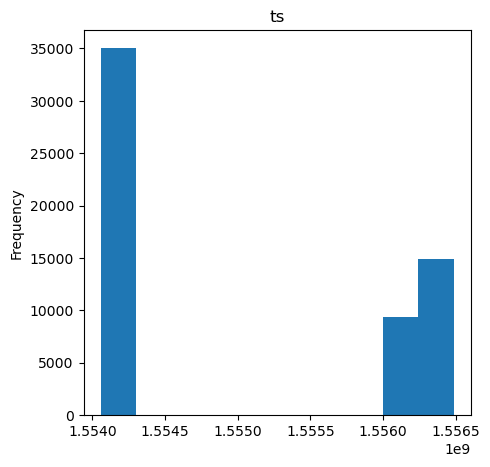

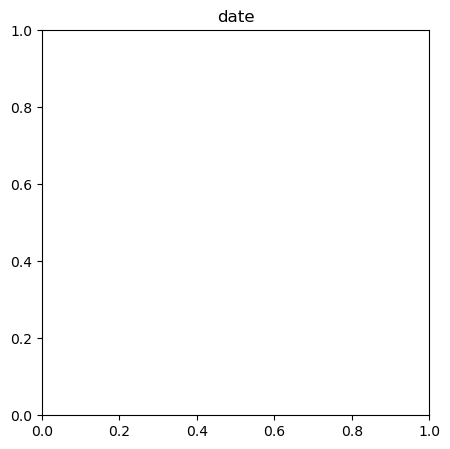

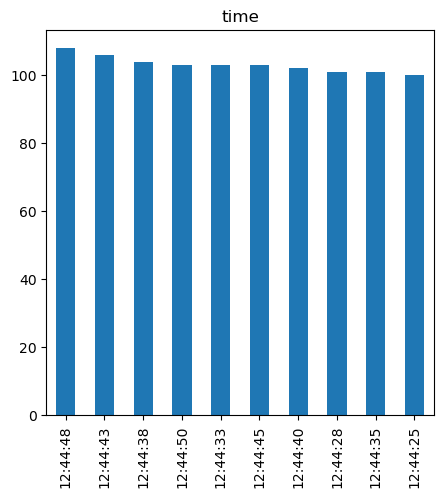

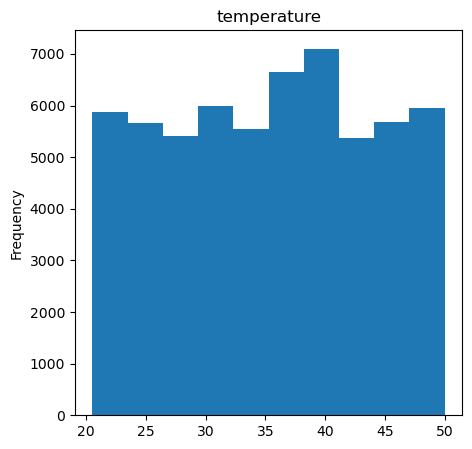

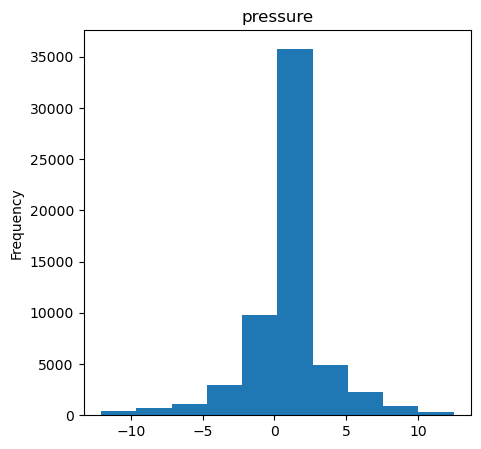

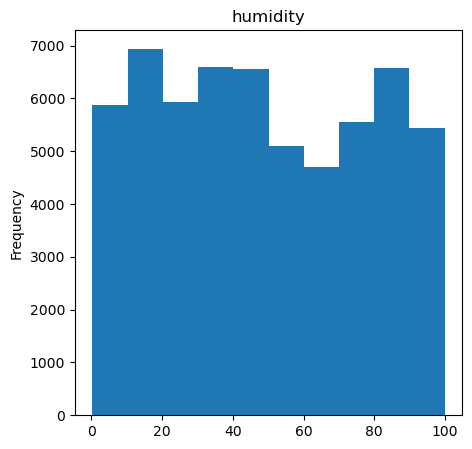

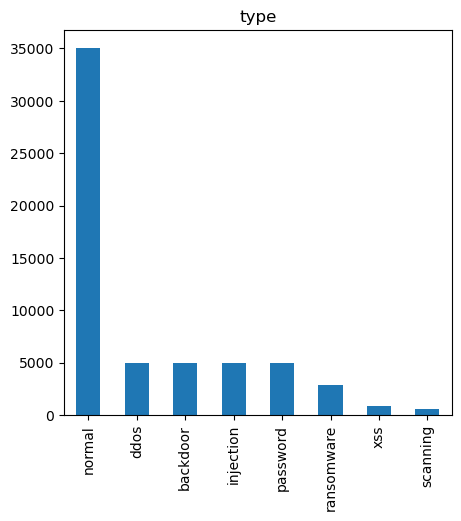

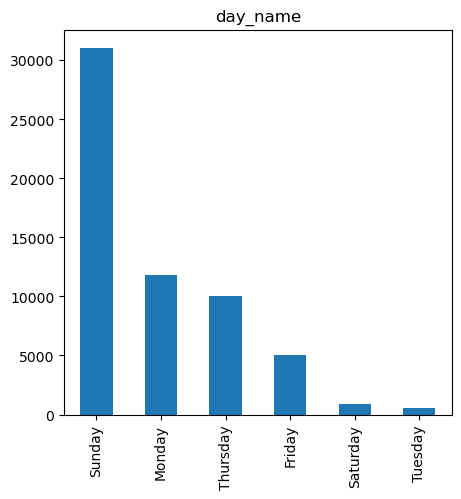

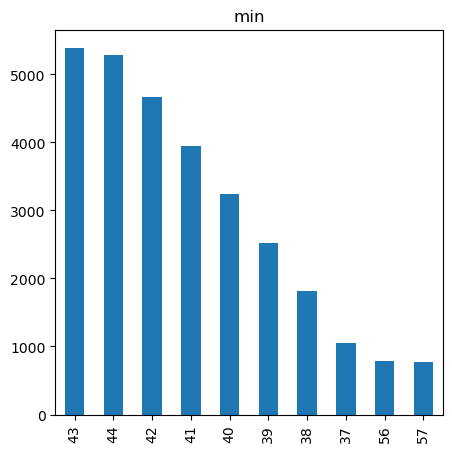

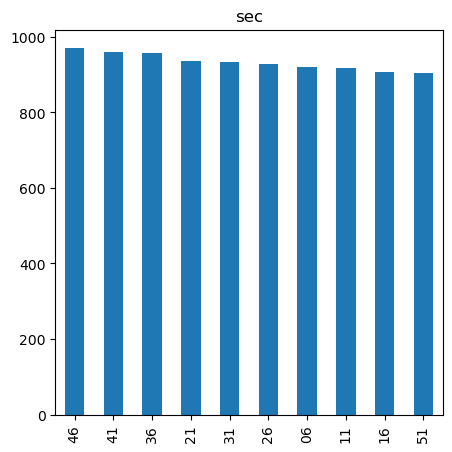

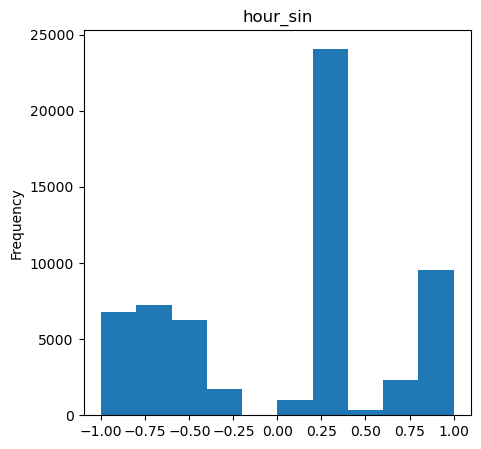

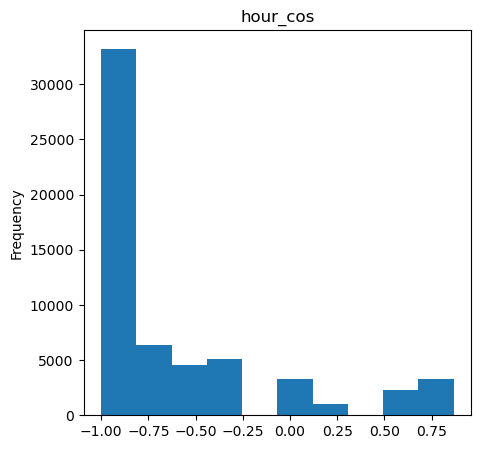

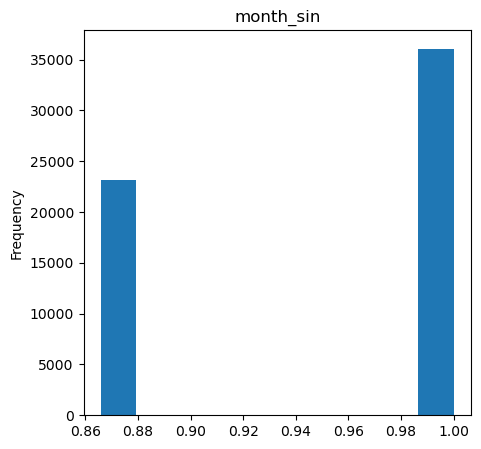

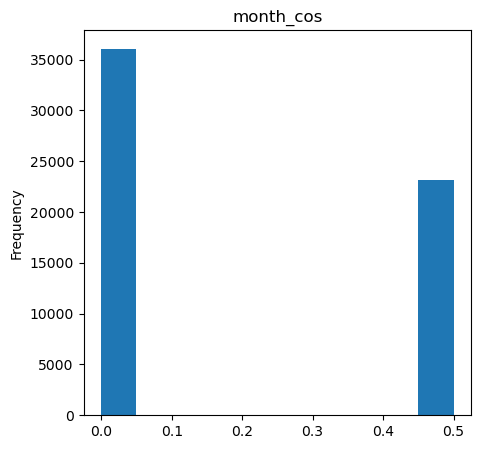

In [26]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [27]:
df

,ts,date,time,temperature,pressure,humidity,type,day_name,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556238796,2019-04-25,17:33:16,40.881866,-0.101806,38.363631,ddos,Thursday,33,16,-0.866025,-0.5,1.0,6.123234e-17
1,1556238796,2019-04-25,17:33:16,44.913806,2.661616,46.141423,ddos,Thursday,33,16,-0.866025,-0.5,1.0,6.123234e-17
2,1556238796,2019-04-25,17:33:16,38.295822,-2.438871,50.850643,ddos,Thursday,33,16,-0.866025,-0.5,1.0,6.123234e-17
3,1556238801,2019-04-25,17:33:21,41.306586,-0.101806,38.363631,ddos,Thursday,33,21,-0.866025,-0.5,1.0,6.123234e-17
4,1556238801,2019-04-25,17:33:21,44.903178,3.080849,46.141423,ddos,Thursday,33,21,-0.866025,-0.5,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59255,1554166618,2019-04-01,17:56:58,32.799434,2.204924,37.024913,normal,Monday,56,58,-0.866025,-0.5,1.0,6.123234e-17
59256,1554166618,2019-04-01,17:56:58,29.453781,-2.030547,90.297894,normal,Monday,56,58,-0.866025,-0.5,1.0,6.123234e-17
59257,1554166619,2019-04-01,17:56:59,47.185992,0.872942,37.687701,normal,Monday,56,59,-0.866025,-0.5,1.0,6.123234e-17
59258,1554166623,2019-04-01,17:57:03,43.097037,3.168207,93.647950,normal,Monday,57,03,-0.866025,-0.5,1.0,6.123234e-17


In [28]:
df['type'].value_counts()

normal        35000
ddos           5000
backdoor       5000
injection      5000
password       5000
ransomware     2865
xss             866
scanning        529
Name: type, dtype: int64

In [29]:
# encoding categorical data using dummies
#from sklearn.preprocessing import LabelEncoder
#categorical_features = ['type']
#for i in categorical_features:
  # df[i] = LabelEncoder().fit_transform(df[i])

In [30]:
df['type'].value_counts()

normal        35000
ddos           5000
backdoor       5000
injection      5000
password       5000
ransomware     2865
xss             866
scanning        529
Name: type, dtype: int64

In [31]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['day_name'],return_df=True)

In [32]:
df=encoder.fit_transform(df) 

In [33]:
list(df.columns)

['ts',
 'date',
 'time',
 'temperature',
 'pressure',
 'humidity',
 'type',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'min',
 'sec',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [34]:
list(df.columns)

['ts',
 'date',
 'time',
 'temperature',
 'pressure',
 'humidity',
 'type',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'min',
 'sec',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [35]:
df

,ts,date,time,temperature,pressure,humidity,type,day_name_0,day_name_1,day_name_2,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556238796,2019-04-25,17:33:16,40.881866,-0.101806,38.363631,ddos,0,0,1,33,16,-0.866025,-0.5,1.0,6.123234e-17
1,1556238796,2019-04-25,17:33:16,44.913806,2.661616,46.141423,ddos,0,0,1,33,16,-0.866025,-0.5,1.0,6.123234e-17
2,1556238796,2019-04-25,17:33:16,38.295822,-2.438871,50.850643,ddos,0,0,1,33,16,-0.866025,-0.5,1.0,6.123234e-17
3,1556238801,2019-04-25,17:33:21,41.306586,-0.101806,38.363631,ddos,0,0,1,33,21,-0.866025,-0.5,1.0,6.123234e-17
4,1556238801,2019-04-25,17:33:21,44.903178,3.080849,46.141423,ddos,0,0,1,33,21,-0.866025,-0.5,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59255,1554166618,2019-04-01,17:56:58,32.799434,2.204924,37.024913,normal,1,1,0,56,58,-0.866025,-0.5,1.0,6.123234e-17
59256,1554166618,2019-04-01,17:56:58,29.453781,-2.030547,90.297894,normal,1,1,0,56,58,-0.866025,-0.5,1.0,6.123234e-17
59257,1554166619,2019-04-01,17:56:59,47.185992,0.872942,37.687701,normal,1,1,0,56,59,-0.866025,-0.5,1.0,6.123234e-17
59258,1554166623,2019-04-01,17:57:03,43.097037,3.168207,93.647950,normal,1,1,0,57,03,-0.866025,-0.5,1.0,6.123234e-17


<AxesSubplot:>

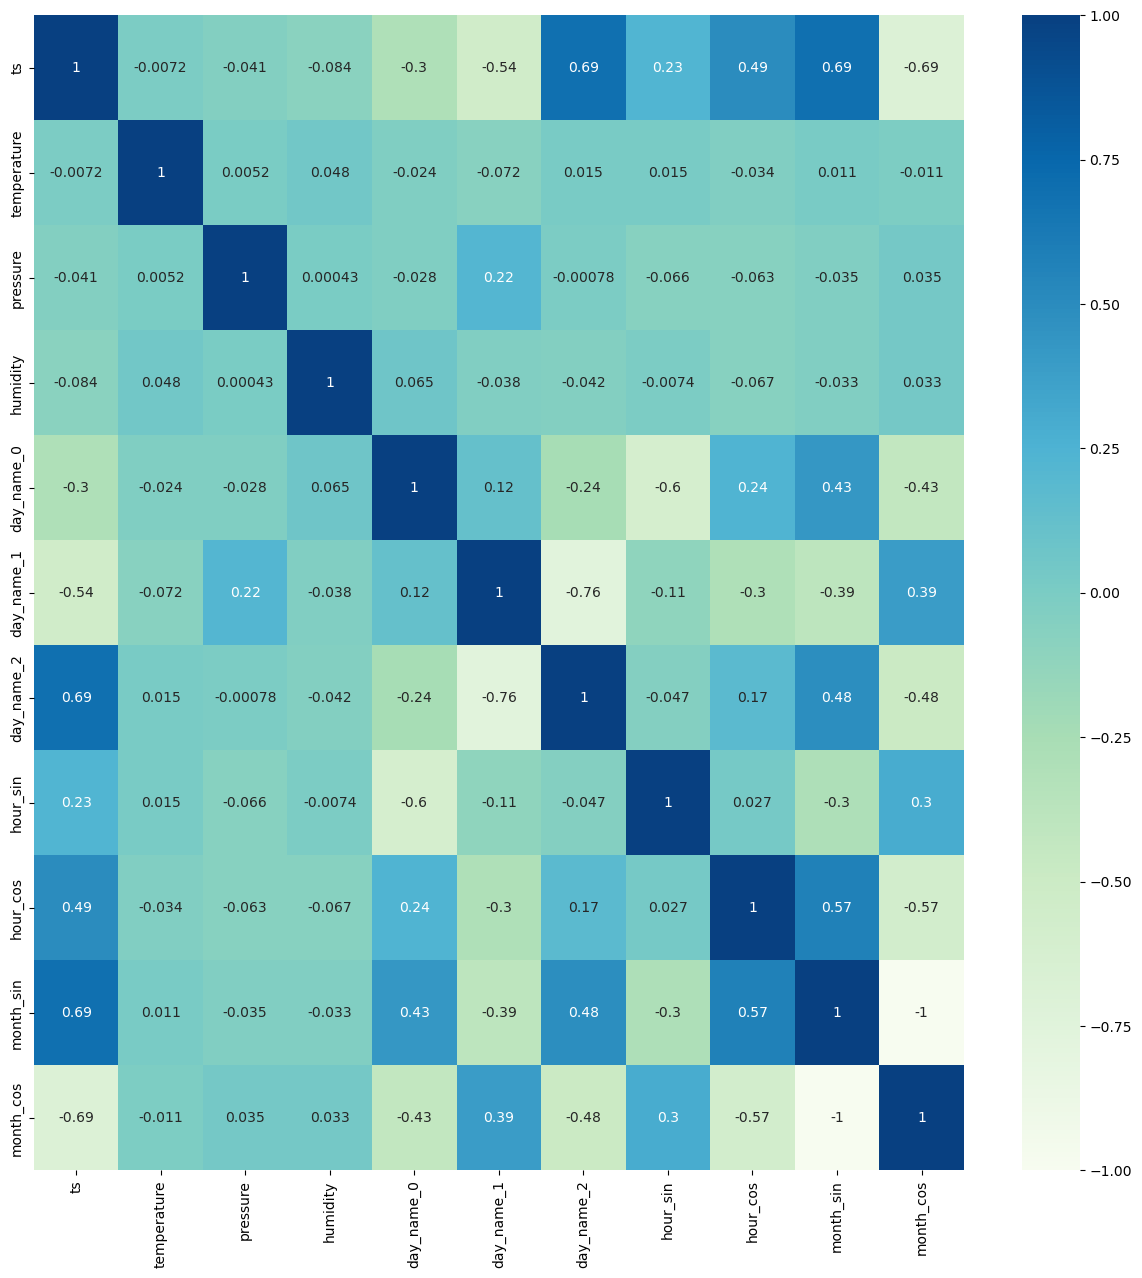

In [36]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


In [37]:
# select and rearrange columns
df = df[['temperature',
 'pressure',
 'humidity',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos','day_name_0',
 'day_name_1',
 'day_name_2','type']]

In [38]:
df

,temperature,pressure,humidity,hour_sin,hour_cos,month_sin,month_cos,day_name_0,day_name_1,day_name_2,type
0,40.881866,-0.101806,38.363631,-0.866025,-0.5,1.0,6.123234e-17,0,0,1,ddos
1,44.913806,2.661616,46.141423,-0.866025,-0.5,1.0,6.123234e-17,0,0,1,ddos
2,38.295822,-2.438871,50.850643,-0.866025,-0.5,1.0,6.123234e-17,0,0,1,ddos
3,41.306586,-0.101806,38.363631,-0.866025,-0.5,1.0,6.123234e-17,0,0,1,ddos
4,44.903178,3.080849,46.141423,-0.866025,-0.5,1.0,6.123234e-17,0,0,1,ddos
...,...,...,...,...,...,...,...,...,...,...,...
59255,32.799434,2.204924,37.024913,-0.866025,-0.5,1.0,6.123234e-17,1,1,0,normal
59256,29.453781,-2.030547,90.297894,-0.866025,-0.5,1.0,6.123234e-17,1,1,0,normal
59257,47.185992,0.872942,37.687701,-0.866025,-0.5,1.0,6.123234e-17,1,1,0,normal
59258,43.097037,3.168207,93.647950,-0.866025,-0.5,1.0,6.123234e-17,1,1,0,normal


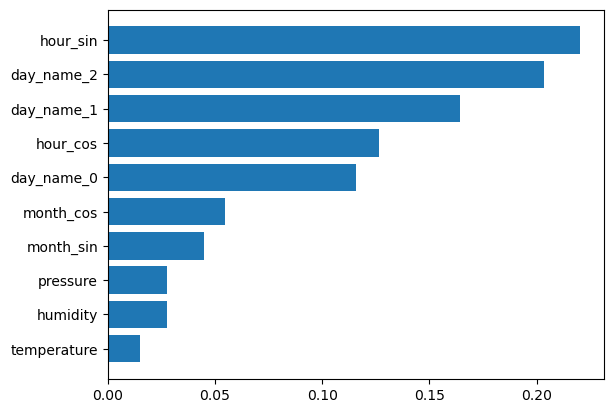

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

X = df.iloc[:,:-1]
y = df["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import datasets


sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_important_train, y_train)
y_pred = rf.predict(X_important_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00      1500
        ddos       1.00      1.00      1.00      1500
   injection       1.00      1.00      1.00      1500
      normal       1.00      1.00      1.00     10500
    password       1.00      1.00      1.00      1500
  ransomware       1.00      1.00      1.00       859
    scanning       1.00      1.00      1.00       159
         xss       1.00      1.00      1.00       260

    accuracy                           1.00     17778
   macro avg       1.00      1.00      1.00     17778
weighted avg       1.00      1.00      1.00     17778

